# Myers Briggs Personalities - Exploratory Data Analysis

### Install Initial Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
import os

CSV_DATA_PATH = os.path.join("data", "mbti_1.csv")

def load_csv_data(csv_file_path: str = CSV_DATA_PATH) -> pd.DataFrame:
    """ Load data from a given csv file into a pandas DataFrame object.

    Args:
        csv_file_path (str) - The file path of the csv file containing the desired data to load into a pandas DataFrame object.

    Returns:
        data (pandas.DataFrame) - The loaded data as a pandas DataFrame object.
    """
    assert csv_file_path.endswith(".csv")

    return pd.read_csv(csv_file_path)

In [3]:
data = load_csv_data()
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data["posts"].iloc[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


### Data Analysis

##### Personality Factors

In [6]:
def get_personality_factors(personality_dataset: pd.DataFrame, personalities_col_name: str = "type") -> dict:
    """ Return a dictionary containing the personality factors from the given pandas DataFrame containing Myers Briggs personalities.

    Args:
        personality_dataset (pandas.DataFrame) - The pandas DataFrame object containing the Myers Briggs personalities data.
        personalities_col_name (str) - The name of the column which contains the Myers Briggs personalities in the given DataFrame.

    Returns:
        personality_factors_dict (dict) - A dictionary containing the number personality factors, split into Extraversion vs Introversion, Sensing vs Intuition, Thinking vs Feeling, Judging vs Perceiving.
    """
    personality_factors_dict = {
        "e_vs_i": [],
        "s_vs_n": [],
        "t_vs_f": [],
        "j_vs_p": []
    }

    for index, row in data.iterrows():
        personality_type_str = row[personalities_col_name]
        e_vs_i = personality_type_str[0]
        s_vs_n = personality_type_str[1]
        t_vs_f = personality_type_str[2]
        j_vs_p = personality_type_str[3]

        personality_factors_dict["e_vs_i"].append(e_vs_i)
        personality_factors_dict["s_vs_n"].append(s_vs_n)
        personality_factors_dict["t_vs_f"].append(t_vs_f)
        personality_factors_dict["j_vs_p"].append(j_vs_p)

    return personality_factors_dict    

In [7]:
from itertools import zip_longest

personality_factors_dict = get_personality_factors(data)

columns = personality_factors_dict.keys()
values = list(zip_longest(*personality_factors_dict.values()))
personality_factors = pd.DataFrame(values, columns=columns)
personality_factors.head()

,e_vs_i,s_vs_n,t_vs_f,j_vs_p
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J


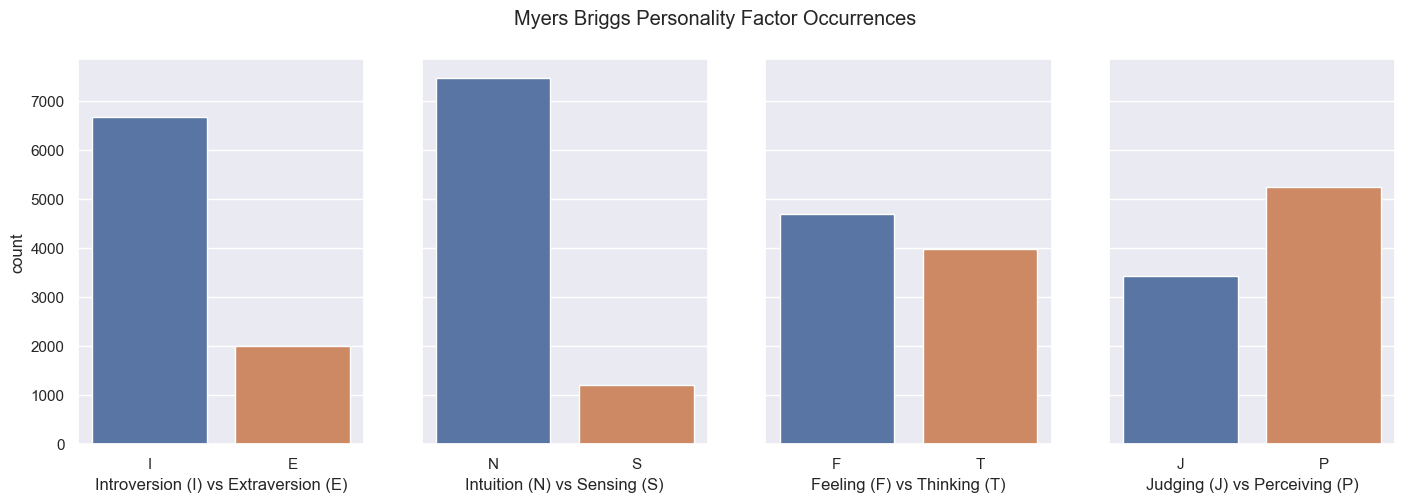

In [8]:
sns.set()

fig, axes = plt.subplots(1, 4, figsize=(17,5), sharey=True)

sns.countplot(data=personality_factors, x="e_vs_i", ax=axes[0])
sns.countplot(data=personality_factors, x="s_vs_n", ax=axes[1])
sns.countplot(data=personality_factors, x="t_vs_f", ax=axes[2])
sns.countplot(data=personality_factors, x="j_vs_p", ax=axes[3])

fig.suptitle("Myers Briggs Personality Factor Occurrences")
axes[0].set_xlabel("Introversion (I) vs Extraversion (E)")
axes[1].set_xlabel("Intuition (N) vs Sensing (S)")
axes[1].set_ylabel("")
axes[2].set_xlabel("Feeling (F) vs Thinking (T)")
axes[2].set_ylabel("")
axes[3].set_xlabel("Judging (J) vs Perceiving (P)")
axes[3].set_ylabel("")

plt.show()

From the above bar plots of the occurances of each of the Myers Briggs personality factors in the given dataset, we can observe the following:
- Significant class imbalances within Extraversion/Introversion and Intuition/Sensing factors.
- Slight class imbalance within Judging/Perceiving factors.
- Not much imbalance within Feeling/Thinking factors.

The dataset is made up of a user's personality type and their most recent 50 comments online for each observation. Therefore, the above graphs might be suggesting that people with Introversion personality factors may make more online posts than Extroverted counterparts by a significant proportion. The same could be suggested for those with Intuition factors against Sensing counterparts, as well as for those with Judging against Perceiving counterparts.

##### Personality Types

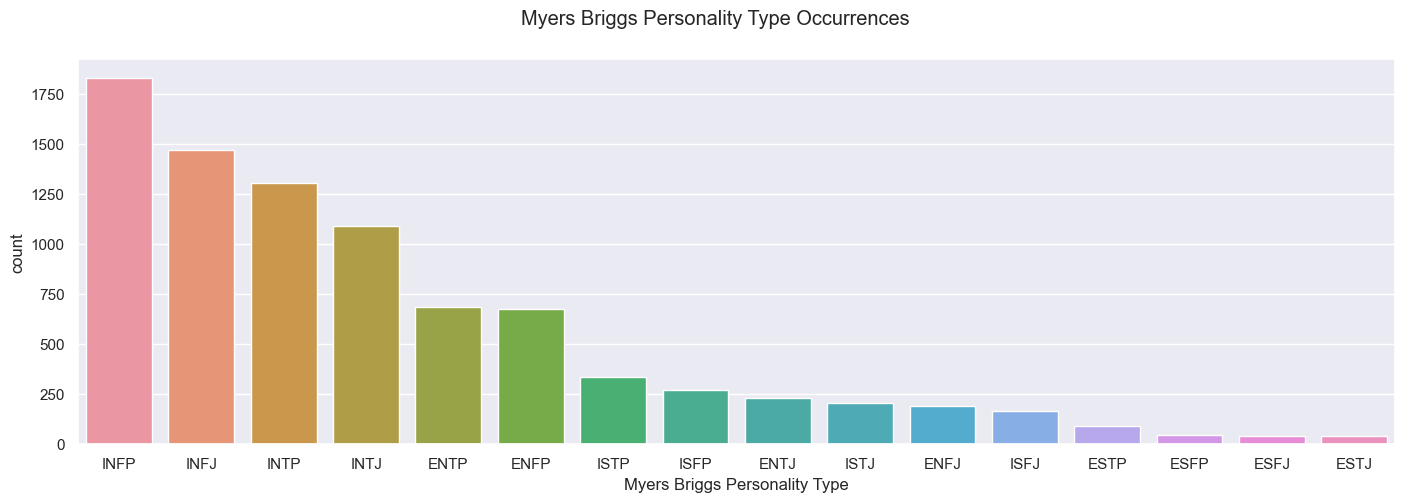

In [9]:
sns.set()

fig = plt.figure(figsize=(17, 5))
ax = fig.add_subplot(1, 1, 1)

sns.countplot(data=data, x="type", ax=ax, order=data["type"].value_counts().index)

fig.suptitle("Myers Briggs Personality Type Occurrences")
ax.set_xlabel("Myers Briggs Personality Type")

plt.show()

From the above plot of Myers Briggs personality type occurrences, we can observe that classs imbalances are also present for the actual personality types. This is likely a carry-over effect of the class imbalances observed from the actual Myers Briggs personality factors in the given dataset.

Given the nature of how the data was curated, the above graph seems to suggest people with introverted and intuitive personality types tend to make more online posts than people with other personality types. This is expected, given what was observed from analysing the previous bar graph of the individual personality factor occurrences observed in the given dataset.

##### Data Wrangling

In [10]:
def get_online_posts_df(df: pd.DataFrame, type_col: str = "type", posts_col: str = "posts") -> pd.DataFrame:
    """ Takes in an input pandas DataFrame, each row having a (user_personality_type, user_recent_50_comments) schema and user_recent_50_comments is a '|||' delimited string.
    Outputs a DataFrame object where each row is a (user_personality_type, user_comment), where each row no contains exactly one comment.

    Args:
        df (pandas.DataFrame) - The input pandas DataFrame object, where each row follows the schema (user_personality_type, user_recent_50_comments).
        type_col (str) - The column name of the input DataFrame's personality type column, which contains the user's personality type.
        posts_col (str) - The column name of the input DataFrame's posts column, which contains the user's recent 50 comments/online posts

    Returns:
        output_df (pandas.DataFrame) - The output pandas DataFrame object, where each row follows the schema (user_personality_type, user_comment).
    """
    online_posts_dict = {
        type_col: [],
        posts_col: []
    }

    for index, row in df.iterrows():
        personality_type = row[type_col]
        recent_50_comments = row[posts_col].split("|||")

        online_posts_dict[type_col] += [personality_type] * len(recent_50_comments)
        online_posts_dict[posts_col] += recent_50_comments

    columns = online_posts_dict.keys()
    values = list(zip_longest(*online_posts_dict.values()))
    output_df = pd.DataFrame(values, columns=columns)

    return output_df

In [11]:
online_posts_df = get_online_posts_df(data)
online_posts_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


In [12]:
online_posts_df["posts"].iloc[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw"

In [13]:
online_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422845 entries, 0 to 422844
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   type    422845 non-null  object
 1   posts   422845 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


##### Feature Engineering
Since there are only two features in the given dataset (type and posts), some additional features will be engineered from the post feature's data in order to see if there is any additional insights to be gained from the data that we have.

In [14]:
# Set up nltk for work token processing.
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

##### Feature Engineering - URL Count

In [15]:
import re

def extract_url_count_from_posts(df: pd.DataFrame, posts_col: str = "posts") -> pd.DataFrame:
    """ Given an input pandas DataFrame that contains a column with user online posts, extract any URLs within each post.

    Args:
        df (pandas.DataFrame) - The input DataFrame object.
        posts_col (str) - The name of the DataFrame column that contains the user online posts.

    Returns:
        df (pandas.DataFrame) - The DataFrame object which contains a new column where each row contains the frequency that a URL has been mentioned for that index.
    """
    regex_pattern = r"((?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])))"
    
    df["url_count"] = df[posts_col].apply(lambda x: re.findall(regex_pattern, x)).str.len()

    return df

In [16]:
online_posts_df = extract_url_count_from_posts(online_posts_df)
online_posts_df.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_13912\1752705540.py:15: DeprecationWarning: Flags not at the start of the expression '((?i)\\b((?:https?://' (truncated) but at position 1
  df["url_count"] = df[posts_col].apply(lambda x: re.findall(regex_pattern, x)).str.len()


,type,posts,url_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,1
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1
2,INFJ,enfp and intj moments https://www.youtube.com...,2
3,INFJ,What has been the most life-changing experienc...,0
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,2


In [17]:
online_posts_df["posts"].iloc[2]

'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'

In [18]:
online_posts_df.tail()

,type,posts,url_count
422840,INFP,I was going to close my facebook a few months ...,0
422841,INFP,30 Seconds to Mars - All of my collections. It...,0
422842,INFP,"I have seen it, and i agree. I did actually th...",0
422843,INFP,Ok so i have just watched Underworld 4 (Awaken...,0
422844,INFP,I would never want to turn off my emotions. so...,0


##### Feature Engineering - Posts with URLs removed

In [28]:
def get_online_posts_no_urls(df: pd.DataFrame, posts_col: str = "posts") -> pd.DataFrame:
    """ Given an input pandas DataFrame that contains a column with user online posts, extract only non-url text from each post.

    Args:
        df (pandas.DataFrame) - The input DataFrame object.
        posts_col (str) - The name of the DataFrame column that contains the user online posts.

    Returns:
        df (pandas.DataFrame) - The DataFrame object which contains a new column where each row contains the online post without any URLs
    """
    regex_pattern = r"((?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])))"

    df["posts_no_url"] = df[posts_col].str.replace(regex_pattern, "").str.strip()

    return df

In [29]:
online_posts_df = get_online_posts_no_urls(online_posts_df)
online_posts_df.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_13912\2250993582.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df["posts_no_url"] = df[posts_col].str.replace(regex_pattern, "").str.strip()


,type,posts,url_count,posts_no_url
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,'
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,
2,INFJ,enfp and intj moments https://www.youtube.com...,2,enfp and intj moments sportscenter not top ...
3,INFJ,What has been the most life-changing experienc...,0,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,2,On repeat for most of today.


In [30]:
online_posts_df["posts"].iloc[100:105]

100    'Good one  _____   https://www.youtube.com/wat...
101    Of course, to which I say I know; that's my bl...
102    Does being absolutely positive that you and yo...
103                  No, I didn't; thank you for a link!
104    So-called Ti-Si loop (and it can stem from any...
Name: posts, dtype: object

In [31]:
online_posts_df["posts"].iloc[100]

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw"

In [32]:
online_posts_df["posts_no_url"].iloc[100]

"'Good one  _____"

##### Feature Engineering - Noun, Verb, Adjective, Adverb Counts

In [ ]:
def pos_tag_posts(df: pd.DataFrame, posts_col: str = "posts_no_url") -> pd.DataFrame:
    """ Given an input pandas DataFrame with a column of online posts, perform POS tagging on the posts and return a DataFrame with a column that contains the POS tagged posts.

    Args:
        df (pandas.DataFrame) - The input DataFrame object.
        posts_col (str) - The name of the DataFrame column that contains the user online posts.

    Returns:
        df (pandas.DataFrame) - The DataFrame object which contains a new column where each row contains the online post after POS tagging.
    """
    df["posts_no_url_tokenized"] = df[posts_col].str.lower().apply(nltk.word_tokenize)
    df["posts_no_url_pos_tagged"] = df["posts_no_url_tokenized"].apply(nltk.pos_tag)

    return df

In [33]:
online_posts_df["posts_no_url_tokenized"] = online_posts_df["posts_no_url"].str.lower().apply(nltk.word_tokenize)
online_posts_df["posts_no_url_pos_tagged"] = online_posts_df["posts_no_url_tokenized"].apply(nltk.pos_tag)
online_posts_df.head()

KeyboardInterrupt: 

In [17]:
online_posts_df["pos_tagged"].iloc[0]

[("'http", 'NNS'),
 (':', ':'),
 ('//www.youtube.com/watch', 'VB'),
 ('?', '.'),
 ('v=qsxhcwe3krw', 'NN')]